In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re


In [33]:
xls = pd.ExcelFile('HospitalDatabase .xlsx')
df1 = pd.read_excel(xls, 'ReAdmissionRegistry')
df2 = pd.read_excel(xls, 'Patients')
df3 = pd.read_excel(xls, 'EDVisits')
df4 = pd.read_excel(xls, 'AmbulatoryVisits')
df5 = pd.read_excel(xls, 'Discharges')
df6 = pd.read_excel(xls, 'Providers')
df7 = pd.read_excel(xls, 'EDUnique')

######  10.Creating a boxplot on ExpectedLOS by taking service into account.

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

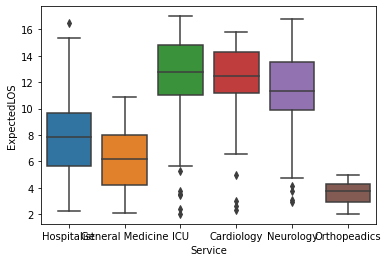

In [34]:
sns.boxplot(data=df1, x="Service", y="ExpectedLOS",  )

###### 11.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

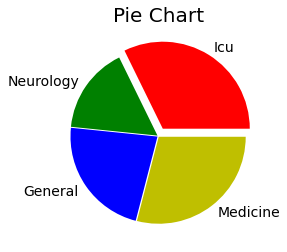

In [35]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside=(0,0.5,0.3)
plt.pie(ExpectedLOS,labels=Service, colors=['r','g','b','y'],explode=(0.1,0.01,0.01,0.01),textprops={'fontsize': 14})
plt.title('Pie Chart',fontsize=20)
plt.show()

###### 23. write a function to find the center element in the list. (one element in odd length list,  two elements in even length list).

In [36]:
input_list=[2,7,4,4,2,7,8,9,0]
def findcenter(input_list):
    center_element= float(len(input_list))/2
    if center_element % 2 != 0:
        return input_list[int(center_element - .5)]
    else:
        return (input_list[int(center_element)], input_list[int(center_element-1)])
center=findcenter(input_list)
center

2

##### 60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [37]:
Los=7
display(df5[(df5['ExpectedLOS']>Los)][['PatientID']])

,PatientID
0,9
3,102
12,134
13,138
16,147
...,...
714,713
715,716
716,723
718,733


###### 59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [38]:
df6_name=df6[['ProviderName']]
df6_name[['Firstname','Lastname']] = df6_name.ProviderName.str.split(expand=True)
df6_name

C:\Users\svani\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ProviderName,Firstname,Lastname
0,Sally Sue,Sally,Sue
1,Mike Myers,Mike,Myers
2,Jordan Michael,Jordan,Michael
3,Ted Texas,Ted,Texas
4,Ala Bama,Ala,Bama
5,Harry Kane,Harry,Kane
6,Barry Bar,Barry,Bar
7,Ted Green,Ted,Green
8,Ted Black,Ted,Black
9,Fred Man,Fred,Man


###### 58. Display total count of patients service wise based on gender.

In [42]:
df_result=pd.concat([df2,df1],axis=1)
df_result.groupby(['Gender','Service']).count()['PatientID']

PatientID  PatientID
Gender Service                               
Female Cardiology               48         48
       General Medicine        121        121
       Hospitalist              30         30
       ICU                      54         54
       Neurology                34         34
       Orthopeadics             20         20
Male   Cardiology               47         47
       General Medicine        142        142
       Hospitalist              71         71
       ICU                      97         97
       Neurology                31         31
       Orthopeadics             25         25

###### 48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [43]:
df5_avg=df5.groupby(['Service','DischargeDisposition']).mean()['ExpectedLOS']
df5_avg

Service           DischargeDisposition
Cardiology        Expired                  9.202626
                  Home                    12.864936
                  Transfer                11.818403
General Medicine  Expired                  5.874003
                  Home                     6.105696
                  Transfer                 6.116124
Hospitalist       Expired                  6.775636
                  Home                     8.009046
                  Transfer                 5.701389
ICU               Expired                  9.919063
                  Home                    13.451158
                  Transfer                11.989238
Neurology         Expired                  9.384312
                  Home                    12.538859
                  Transfer                11.469198
Orthopeadics      Expired                  3.943883
                  Home                     3.508337
                  Transfer                 4.842255
Name: ExpectedLOS, dtype:

###### 46. Write a code to split a sentence into words using regex.

In [44]:
string = "python hackathon september2022"
re.split("(?:(?:[^a-zA-Z]+')|(?:'[^a-zA-Z]+))|(?:[^a-zA-Z']+)", string)

['python', 'hackathon', 'september', '']

###### 36.Create a correlation matrix on EDVisits.

In [45]:
corrMatrix = df3.corr()
print (corrMatrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


###### 34. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [46]:
b=np.arange(1,31).reshape(6,5)
c=b[0:4,1:5]
c.diagonal()

array([ 2,  8, 14, 20])

###### 35. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [47]:
a=np.arange(1,31).reshape(6,5)
a[2:4,0:2]

array([[11, 12],
       [16, 17]])

###### 22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [48]:
df_temp = df3.groupby(["EDDisposition","Acuity"]).count()["PatientID"]
pd.DataFrame(data = df_temp)

PatientID
EDDisposition Acuity           
Admitted      1              32
              2             116
              3              81
              4             107
              5             179
Discharged    1             558
              2              66
              4              30
              5              30

###### 47.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [49]:
#Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.
max_bp = df4["BloodPressureSystolic"].max()
max_bp = df4.loc[(df4["BloodPressureSystolic"]==190)]
max_bp

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


###### 70 Plot a graph to show the distribution of expected mortality.

C:\Users\svani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


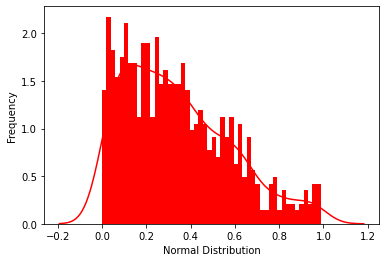

In [27]:
ax = sns.distplot(df5['ExpectedMortality'],
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

###### 71 Create a visualization on the count of patients based on primary diagnosis.

<AxesSubplot:title={'center':'Count of patients based on primary diagnosis'}, xlabel='PrimaryDiagnosis', ylabel='PrimaryDiagnosis'>

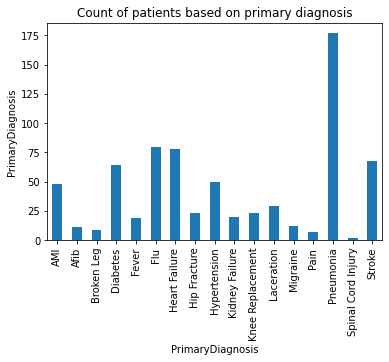

In [55]:

df5_pd=df5.groupby(['PrimaryDiagnosis']).count()['PatientID']
df5_pd=df5.groupby(['PrimaryDiagnosis']).count()['PatientID'].plot(kind='bar',ylabel='PrimaryDiagnosis',title="Count of patients based on primary diagnosis")
df5_pd

###### 78 .Find reasonForVisit with highest count of acuity 5 patients.

In [50]:
df_hcp=df3.loc[(df3['Acuity']== 5)]
max_hcp = df3["ReasonForVisit"].max()
max_hcp

'Stomach Ache'

###### 56.Count of canceled status.

In [51]:

df4_canceled=df4.loc[(df4['VisitStatus']=='Canceled')]
df4_canceled['VisitStatus'].count()

60

###### 24.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [54]:
df_patients=df7.groupby(['ReasonForVisit','EDDisposition']).count().unstack()
df_patients['PatientID']

EDDisposition,Admitted,Discharged,admitted,discharged
ReasonForVisit,,,,
Accident,NaN,NaN,37.0,NaN
Bleeding,14.0,11.0,NaN,NaN
Car Accident,15.0,NaN,1.0,NaN
Chest Pain,66.0,NaN,14.0,11.0
Fever,NaN,88.0,40.0,44.0
Gun Shot,NaN,NaN,16.0,NaN
Intoxication,NaN,NaN,NaN,23.0
Laceration,NaN,22.0,NaN,NaN
Migraine,26.0,31.0,15.0,44.0
